[1] "b3um_I1000mA_t50us_fs5kHz.txt"

,V1,V2
1,8.167,6.533
2,8.155,6.648
3,8.104,6.621
4,8.078,6.648
5,8.091,6.588
6,8.133,6.608
7,8.198,6.622
8,8.164,6.587
9,8.132,6.578
10,8.107,6.654


[1] 100000

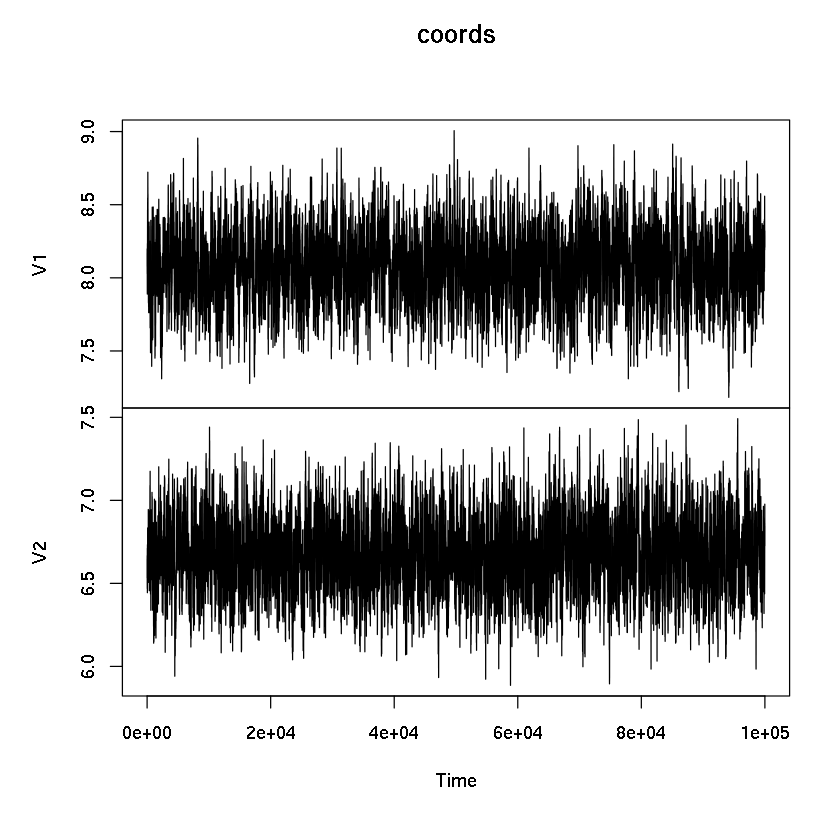

In [27]:
#ddir = '../opt tweez data/06_03_2014/'
ddir = '../opt tweez data/02_12_2014/2_12_2014_part3/'
files = list.files(ddir)
#fn = 5 #length(files) # We take the last one for no particular reason
fn = 5
files[fn]

coords = read.table(paste(ddir,files[fn],sep=''),sep =';',dec = ',')
coords[1:10,]
length(coords[,1])
#coords = ts(coords[,2:3]) # line numbers, etc. present
coords = ts(coords[,1:2])
plot(coords)

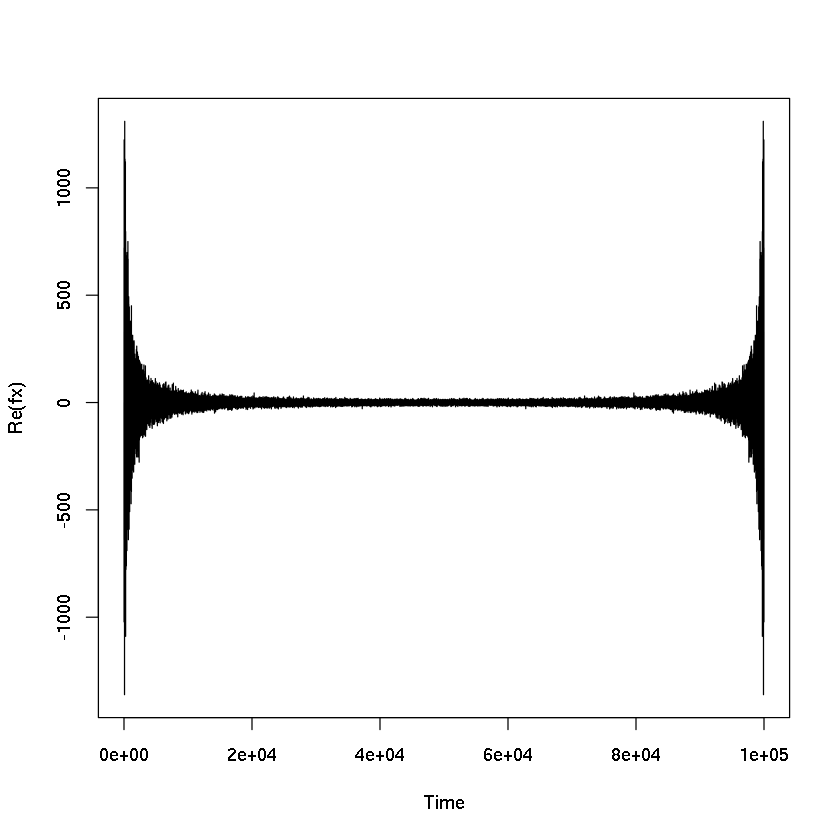

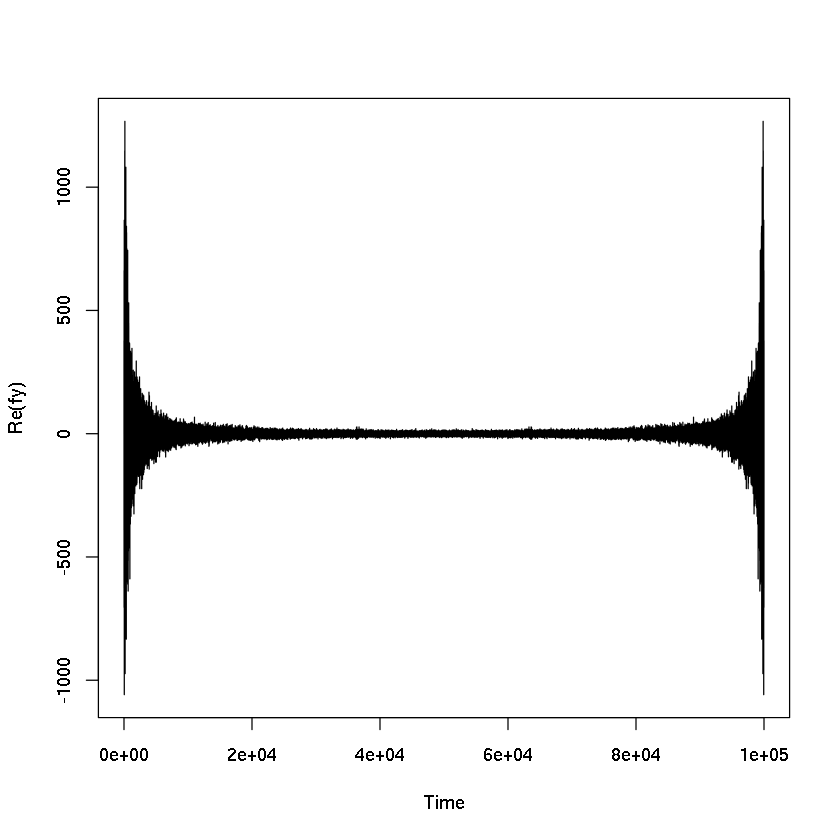

In [28]:
fx = fft(coords[,1]-mean(coords[,1]))
fy = fft(coords[,2]-mean(coords[,2]))
plot(Re(fx),type='l')
plot(Re(fy),type='l')

Split the data in half (by time), to check whether it is invariant in time:

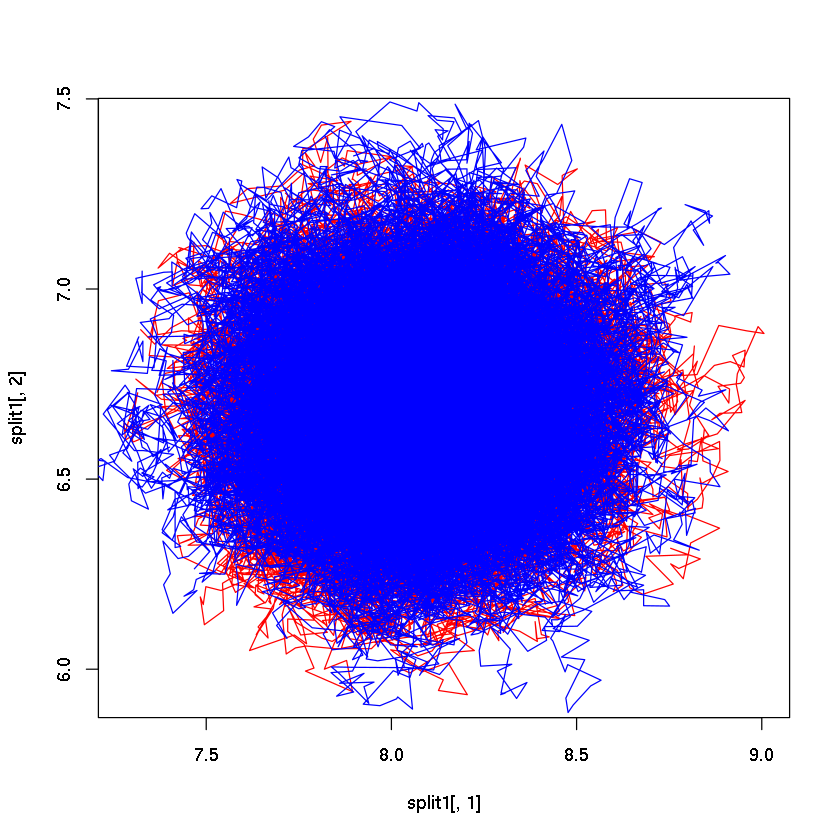

In [29]:
nsamples=length(coords[,1])
split1idx = 1:(nsamples/2)
split2idx = (nsamples/2+1):nsamples
split1 = coords[split1idx,]
split2 = coords[split2idx,]

plot(split1[,1],split1[,2],type='l', col = 'red')
lines(split2[,1],split2[,2],col='blue')

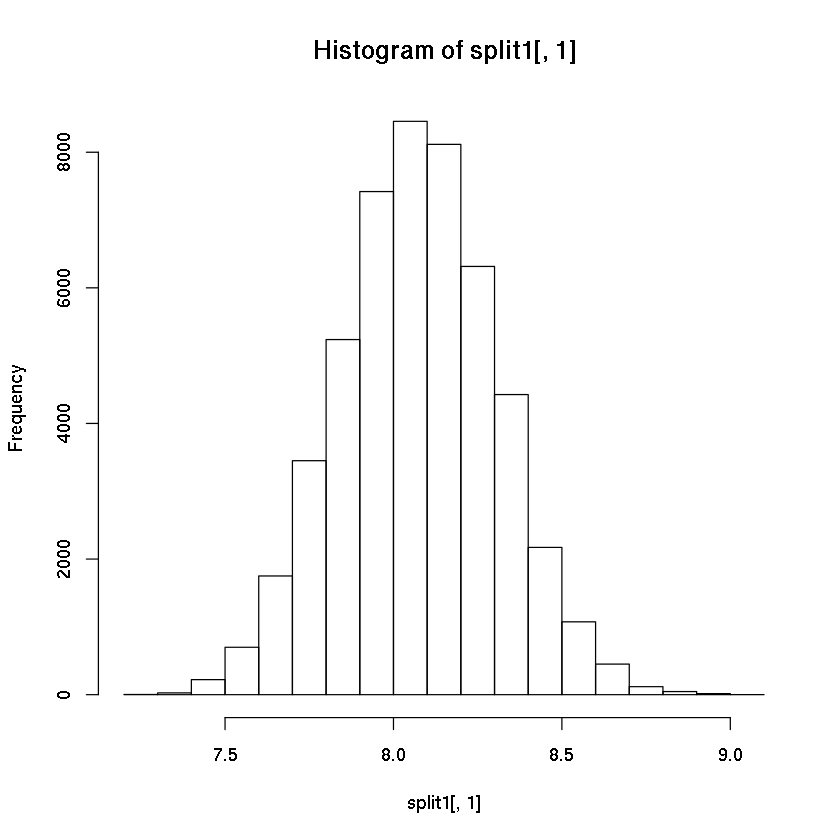

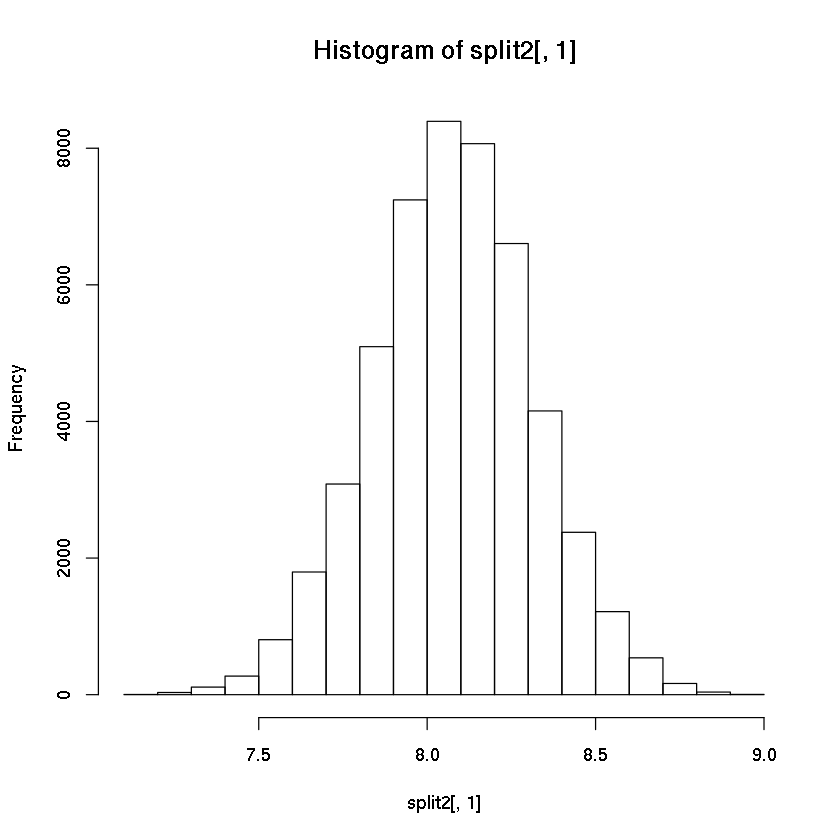

In [30]:
hist(split1[,1])
hist(split2[,1])

In [31]:
ks.test(split1[,1],split2[,1])
ks.test(split1[,2],split2[,2])

Warning message:
In ks.test(split1[, 1], split2[, 1]): p-value will be approximate in the presence of ties


	Two-sample Kolmogorov-Smirnov test

data:  split1[, 1] and split2[, 1]
D = 0.01088, p-value = 0.005377
alternative hypothesis: two-sided


Warning message:
In ks.test(split1[, 2], split2[, 2]): p-value will be approximate in the presence of ties


	Two-sample Kolmogorov-Smirnov test

data:  split1[, 2] and split2[, 2]
D = 0.01912, p-value = 2.305e-08
alternative hypothesis: two-sided


Calculate velocities for the two halves

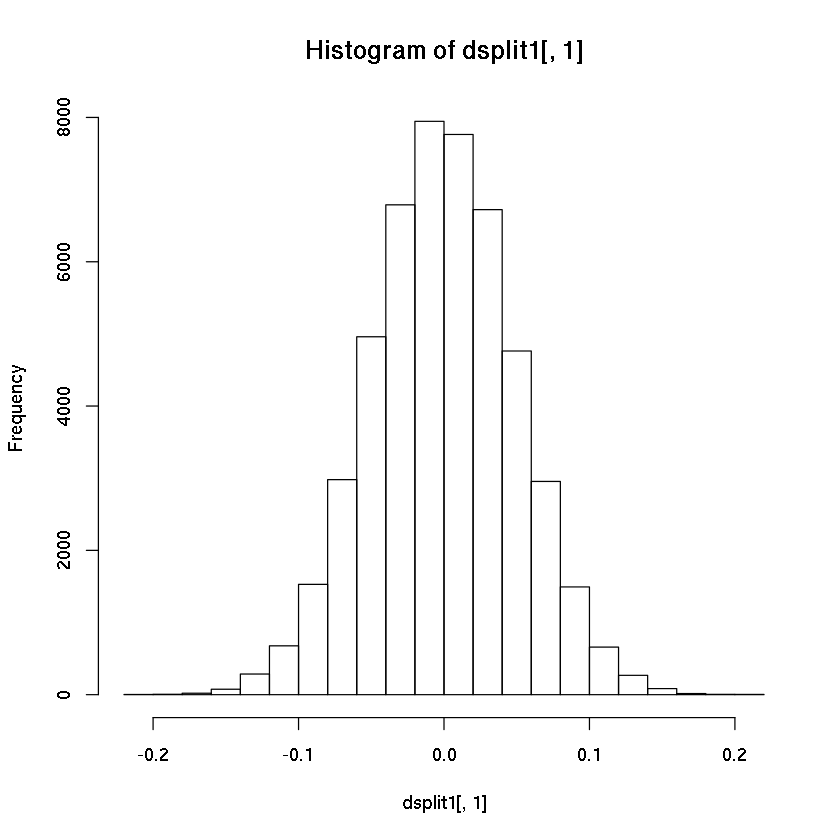

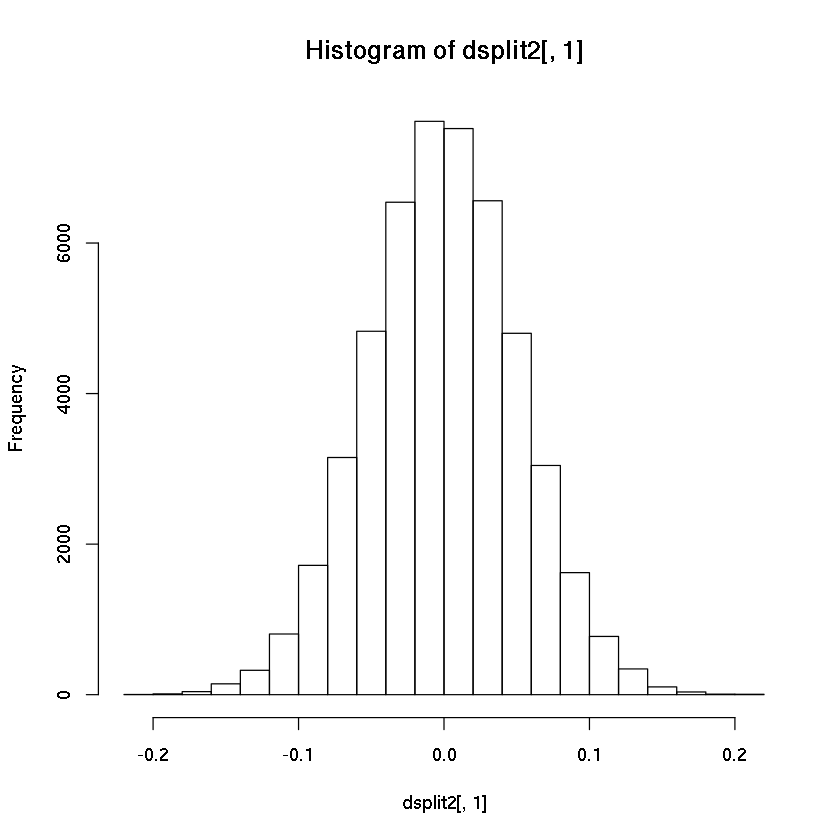

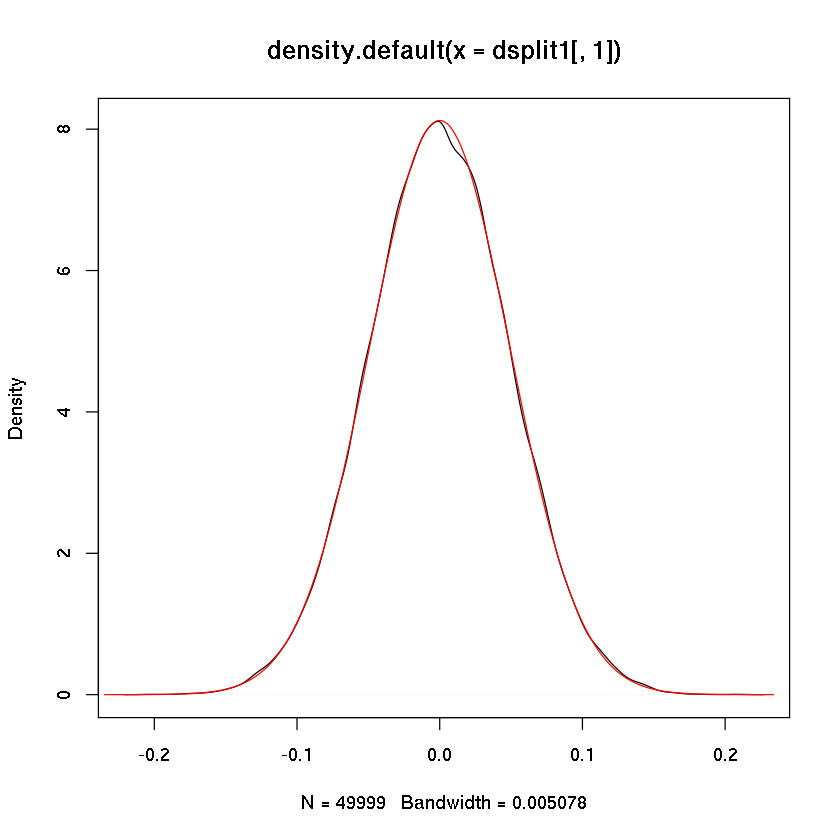

In [32]:
dsplit1 = diff(split1, lag = 1)
dsplit2 = diff(split2, lag = 1)

hist(dsplit1[,1])
hist(dsplit2[,1])

dnsdx1 = density(dsplit1[,1])
dnsdx2 = density(dsplit2[,1])
plot(dnsdx1)
lines(dnsdx2$x,dnorm(dnsdx2$x,mean = mean(dsplit1[,1]),sd = sd(dsplit1[,1])),col='red')

In [33]:
#plot(ts(dsplit1))

#plot(dsplit1[,1], dsplit1[,2])
#plot(dsplit2[,1], dsplit2[,2])

ks.test(dsplit1[,1], dsplit2[,1])
ks.test(dsplit1[,2], dsplit2[,2])

Warning message:
In ks.test(dsplit1[, 1], dsplit2[, 1]): p-value will be approximate in the presence of ties


	Two-sample Kolmogorov-Smirnov test

data:  dsplit1[, 1] and dsplit2[, 1]
D = 0.01248, p-value = 0.0008296
alternative hypothesis: two-sided


Warning message:
In ks.test(dsplit1[, 2], dsplit2[, 2]): p-value will be approximate in the presence of ties


	Two-sample Kolmogorov-Smirnov test

data:  dsplit1[, 2] and dsplit2[, 2]
D = 0.01144, p-value = 0.002878
alternative hypothesis: two-sided


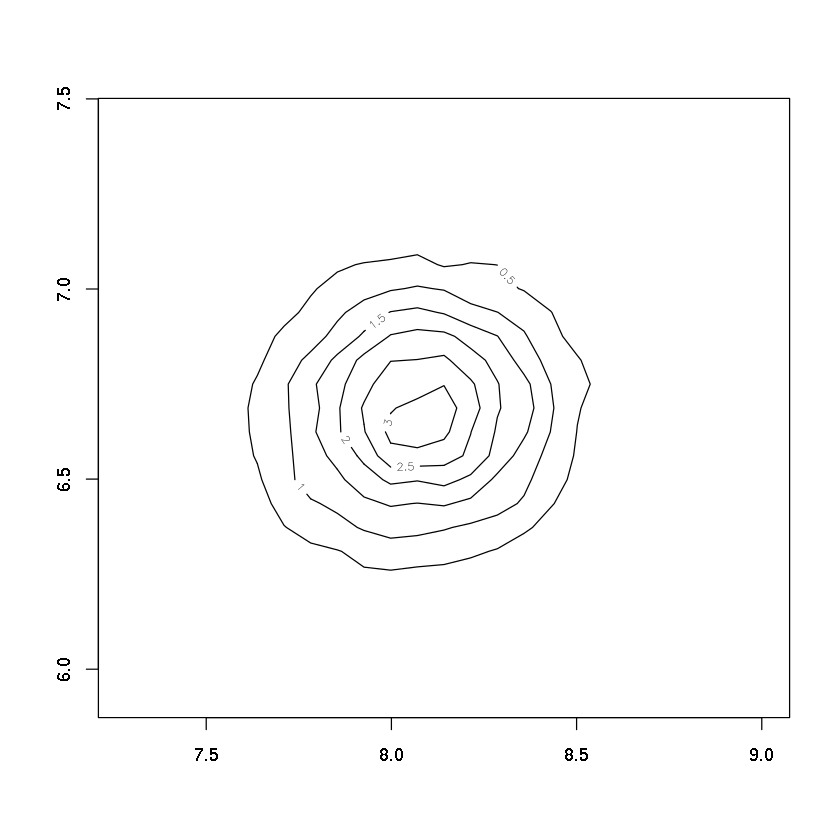

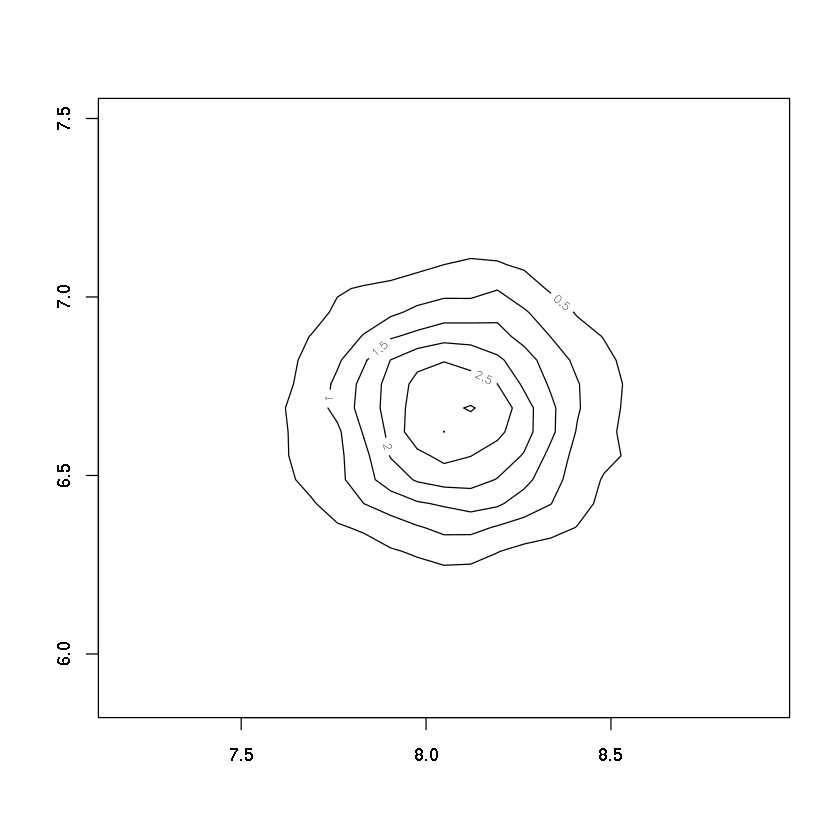

In [34]:
library('MASS')
contour(kde2d(split1[,1],split1[,2]))
contour(kde2d(split2[,1],split2[,2]))

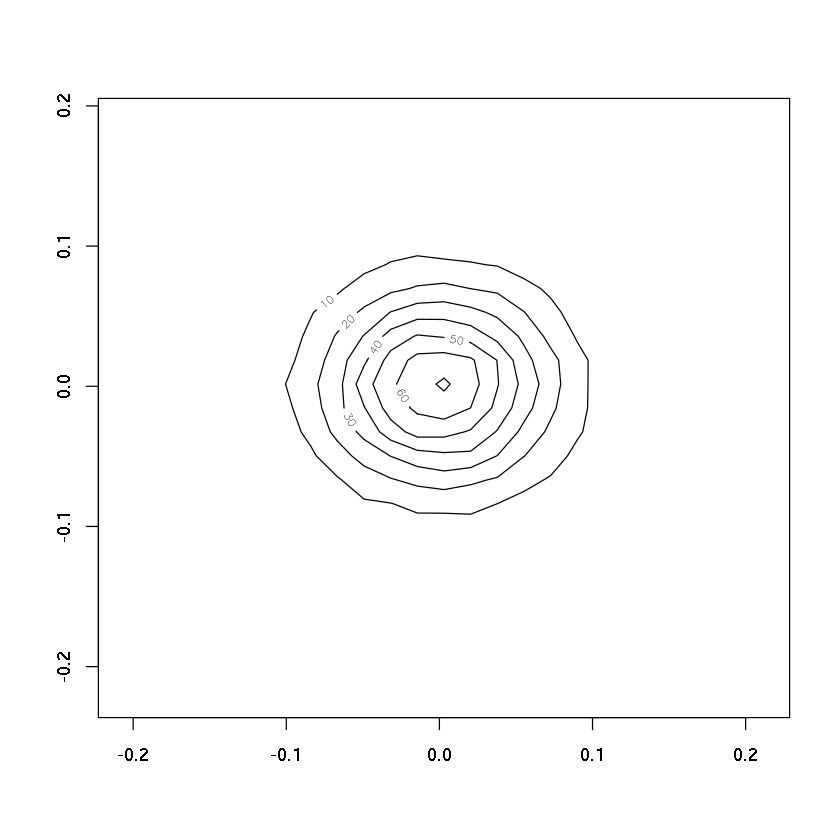

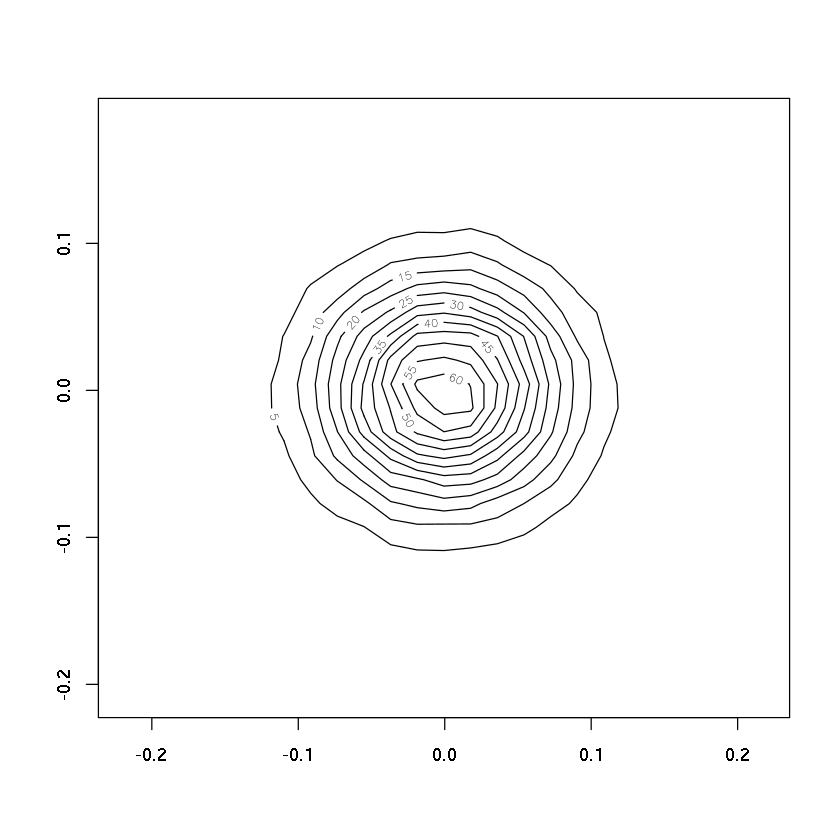

In [35]:
contour(kde2d(dsplit1[,1],dsplit1[,2]))
contour(kde2d(dsplit2[,1],dsplit2[,2]))

Calculate the autocorrelation (or autocovariance) of the coordinates:

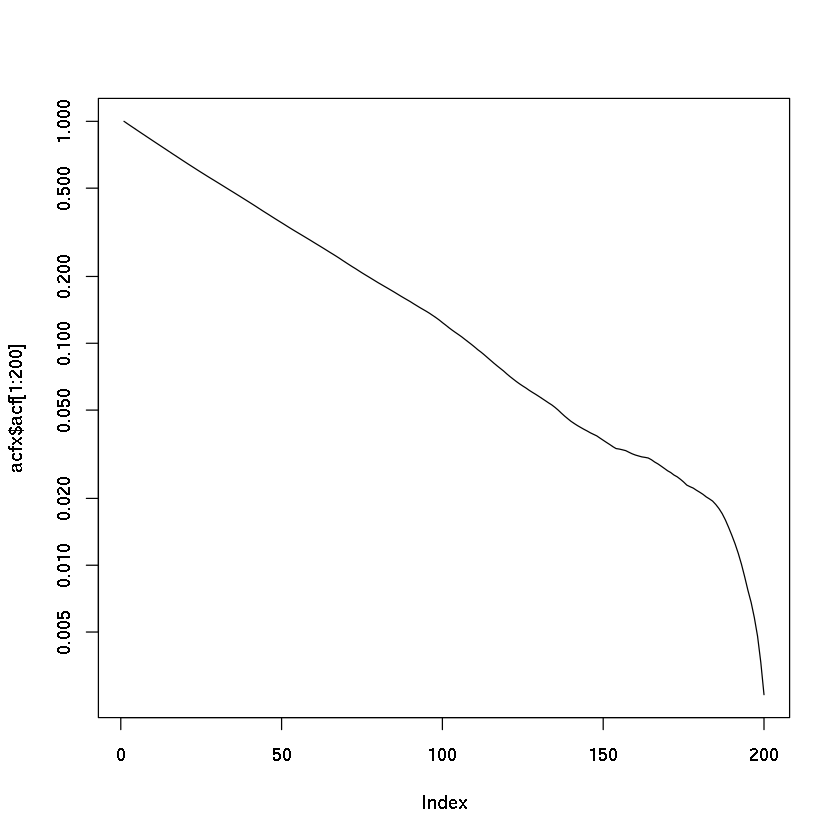

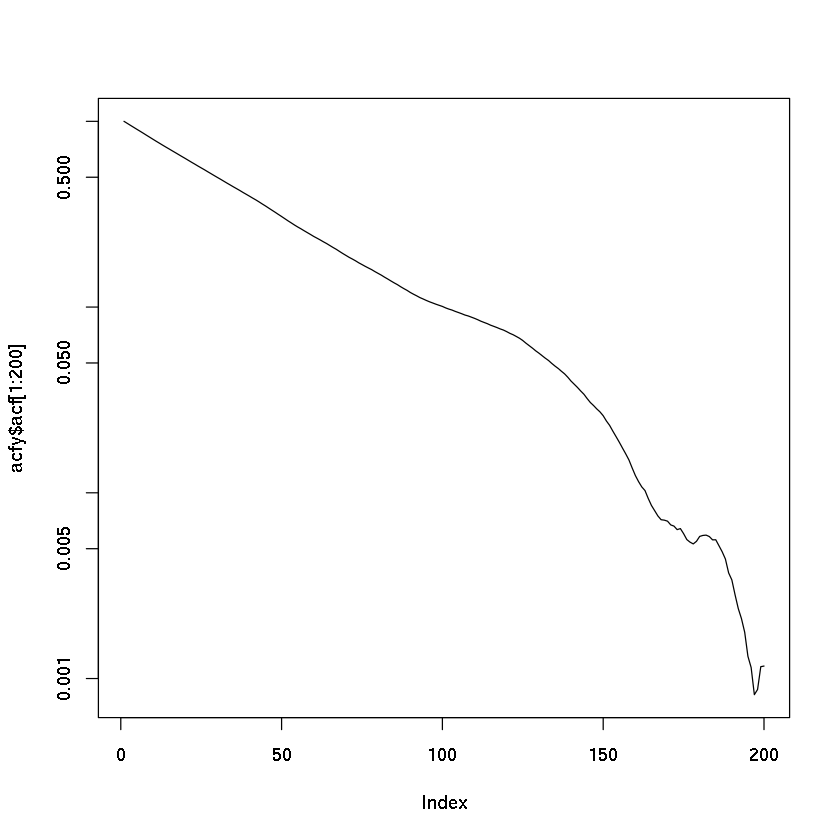

In [36]:
acfx = acf(coords[,1], lag.max = 1000, plot=FALSE)
acfy = acf(coords[,2], lag.max = 1000, plot=FALSE)
plot(acfx$acf[1:200], type='l',log='y')
plot(acfy$acf[1:200], type='l',log='y')

...and for the velocities (differences):

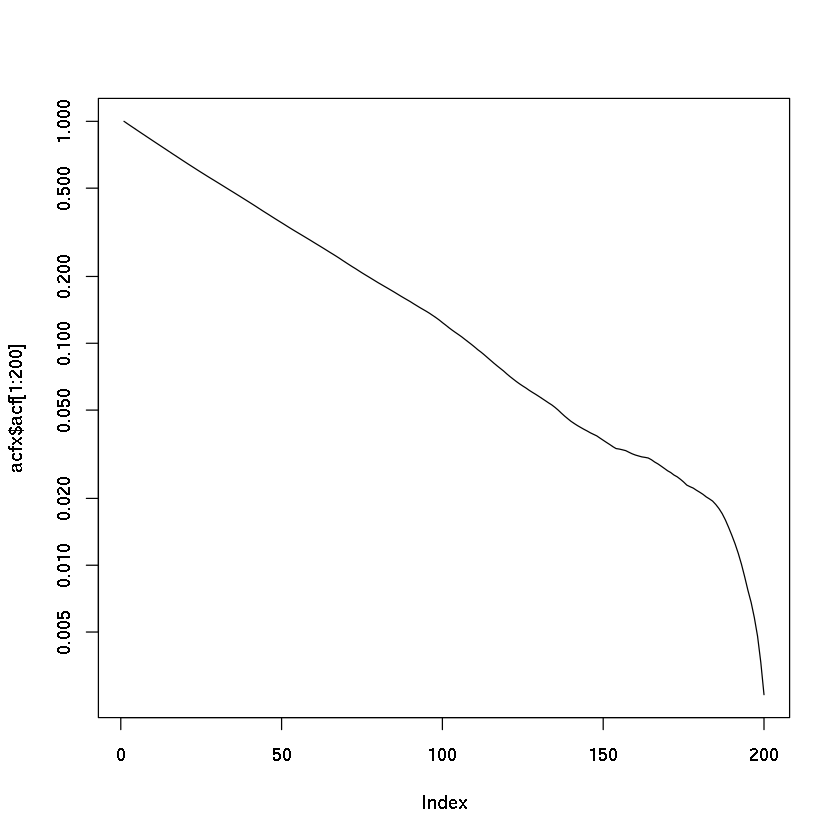

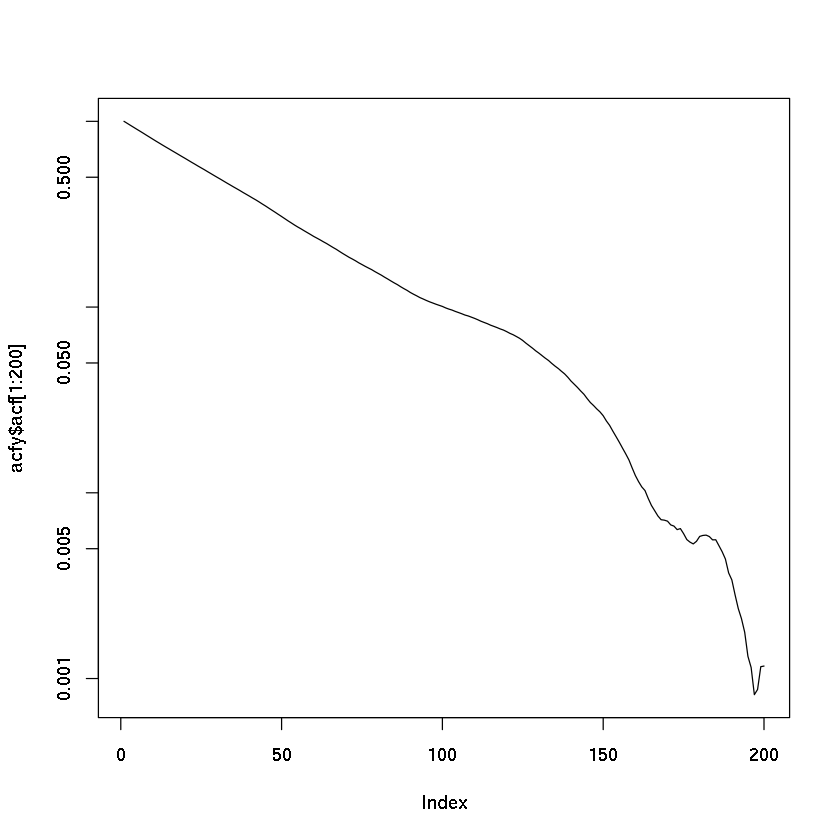

In [37]:
dacfx = acf(diff(coords[,1]), lag.max=1000, plot = FALSE)
dacfy = acf(diff(coords[,2]), lag.max=1000, plot = FALSE)
plot(acfx$acf[1:200], type='l',log='y')
plot(acfy$acf[1:200], type='l',log='y')

Langevin model predicts that $\log(\mathrm{acov}(\tau)) = \frac{k}{\beta} \tau + C$

In [38]:
#linpart = 1:50 # Indices for which the behaviour is linear
fps = 5000;

linpart = 1:100
ax = seq(0, (length(linpart)-1)*(1/fps), 1/fps)
logacfx = log(acfx$acf[linpart])
fitx = lm(logacfx ~ ax)
fitx$coefficients

logacfy = log(acfy$acf[linpart])
fity = lm(logacfy ~ ax)
fity$coefficients

(Intercept)            ax 
  -0.02151265 -104.38208772

(Intercept)            ax 
  -0.01160265 -118.37818548

Gibbs distribution gives $\mathrm{var}(x) \sim \frac{1}{k}$

In [39]:
kb = 1.38064852 * 10^(-23)
T = 293

kx = (kb*T)/(var(coords[,1]))
ky = (kb*T)/(var(coords[,2]))
kx
ky

[1] 7.318434e-20

[1] 8.943629e-20